In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
from  tqdm import  tqdm

In [3]:
cd ~/WorkSpace/GoogleDrive/제주_전기차/data

/home/miwoos/WorkSpace/GoogleDrive/제주_전기차/data


In [4]:
ls

 0326전기차수집내용다합침.csv      블로그전기차문장.csv
 CFI전기차보도자료.csv             블로그제사모느영나영전기차동호회merge.csv
 best_model.h5                     빈도수파악.png
 cafe댓글추출후분석.csv            인스타전기차.csv
 df_cafe_commet_merge.csv          인스타전기차충전소.csv
 elc_usewordcloud.png             '전기차 동호회 전기차크롤링.csv'
 elecafe.csv                       전기차_전처리및토큰화.csv
 lr.pkl                           '전기차감성분석(0325).csv'
 lrc.pkl                           전기차감성분석.csv
 model/                            전기차관련검색어인기순.csv
 tvect.pkl                         전기차관심도지역.csv
 감성사전분석.csv                  전기차관심증가.csv
 관련키워드.csv                    전기차전처리추가.csv
 네이버-제주전기차후기통합.csv     전기차키워드관련주제인기순.csv
 네이버블로그감성분석비교.csv      전체본문의댓글결과_2022.03.06.xlsx
 느영나영전기차크롤링.csv          제사모크롤링.csv
 느영나영전기차크롤링.csv.part     카페통합감성추가.csv
'본문 검색 결과_2022.03.06.xlsx'   투플럭스sjeju.csv


In [5]:
df = pd.read_csv('0326전기차수집내용다합침.csv')

In [6]:
df.카페명.value_counts()

전기차동호회(투플럭스)    394778
네이버블로그            8719
느영나영              4932
전기차동호회            4435
제사모               1295
Name: 카페명, dtype: int64

In [19]:
df.head(2)

,제목,내용,유형,조회수,작성날짜,월별,카페명,년별,평가
0,봉고3더블캡,보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요 거래 지역...,제사모 중고장터,130,2022.03.16.,2022.03,제사모,2022,P
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서 렌트카 알아보고 있어요 육지에선 ...,Q. 종합 질문방,161,2022.03.16.,2022.03,제사모,2022,N


In [27]:
df.카페명.unique()

array(['제사모', '느영나영', '전기차동호회', '네이버블로그', '전기차동호회(투플럭스)'], dtype=object)

<AxesSubplot:xlabel='년별'>

/home/miwoos/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/miwoos/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/miwoos/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/miwoos/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/miwoos/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/miwoos/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:2

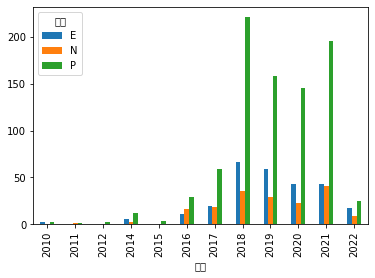

In [7]:
df[df.카페명=='제사모'].groupby([df.년별,df.평가]).내용.count().unstack().plot.bar()

In [100]:
[df.내용.value_counts()[x] for x in df.내용.value_counts() if df.내용.value_counts().values[x]>10]

KeyboardInterrupt: 

In [209]:
for i in tqdm(range(len(df.내용.value_counts()))):
    if df.내용.value_counts().values[i]<2:
        print (i)
        break

  1%|▎                                 | 4174/397144 [20:08<31:35:48,  3.45it/s]

1


In [205]:
 df.내용.value_counts()[300:4173].values

array([9, 9, 9, ..., 2, 2, 2])

In [184]:
stopcontents =  df.내용.value_counts()[:4174].keys()

In [185]:
len(stopcontents)

4174

In [181]:
stopcontents[0]

'출석 하다 출석 하다'

In [13]:
df.내용.str.contains('출석 하다')

0         False
1         False
2         False
3         False
4         False
          ...  
414154    False
414155    False
414156    False
414157    False
414158    False
Name: 내용, Length: 414159, dtype: bool

In [186]:
# for content in tqdm(stopcontents):
df['내용거른거'] = df['내용'].apply(lambda x: None if x in stopcontents else x)

In [210]:
df.내용거른거.value_counts()

 보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요   거래 지역  한림 거래 방법  직거래 연락 방법  연락처 안심번호 쪽지 채팅 가능  카카오톡 금지  판매 가격  연락주세요 판매 제품  봉고더블캡 제품 상태  중고차량사용감 있음 거의 새 것 미개봉  제품설명 및 사진 봉고더블캡  년 월식 정확히 만탔구요오토 차량 잡소리 하나도 안나요전기차 나와서 팔아요블랙박스후방감지 네비 열선시트 열선 핸들 만든공구함 박스 핸즈프리                  1
유리 막 코팅 요 어디 어디 히 늘다 좋다 트렁크 헤드 해당 사항 아니다 던데 맞다 그리고 도어 손잡이 센서 있다 근데 해도 괜찮다 지장 없다 헤드 램프 사이드 범퍼 앞뒤 하다 좋다 이건 추가 비용 내다 하다 장점 알다 도어 엣지 주 유구 하다 생각 이다 위 다른 곳 하다 하다 말 아 야하다 고민 하고 있다 차 컬러 블랙 이다 유리 막 코팅 시트 코팅 필요없다 말씀 하다 썬팅 샵 있다 하다 괜찮다 하다 썬팅 샵 있다 모르다                           1
아파트 완속 충전기 설치 세대 아파트 이다 현재 완속 급속 있다 입 대위 에서 대다 추가 설치 하다 논의 중 이다 고민 하다 중 완속 충전기 대당 주차 면 면 할당 하다 어떻다 하다 생각 해 보다 충전기 꽂히다 차량 충전 끝나다 괜히 전화하다 필요없다 옆 주차 면 주차 하고 충전기 빼다 충전 하다 어떻다 하다 생각 해 보다 어떻다 요 완속 이라서 크다 효과 없다 충전기 빼 가다 싸움 나다 등등 고민 하다 겪다 보지 않다 일이 라 자다 모르다 횐님들 의견 부탁드리다    1
모델 트림 스탠다드 랑 롱 레인지 고민 중 인데 평소 짧다 거리 만 다니다 스탠다드 로 가도 크다 차이 없다                                                                                                                                           

In [39]:
df.내용.str.contains(f'{df.내용.value_counts()[:60].keys()[0]}').value_counts()

False    412996
True       1163
Name: 내용, dtype: int64

In [211]:
df.isnull().sum()

제목           0
내용           0
유형           0
조회수          0
작성날짜         0
월별           0
카페명          0
년별           0
평가           0
내용거른거    21189
dtype: int64

In [212]:
df.to_csv('광고거른거.csv',index=False)

In [217]:
df.내용거른거.value_counts()

 보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요   거래 지역  한림 거래 방법  직거래 연락 방법  연락처 안심번호 쪽지 채팅 가능  카카오톡 금지  판매 가격  연락주세요 판매 제품  봉고더블캡 제품 상태  중고차량사용감 있음 거의 새 것 미개봉  제품설명 및 사진 봉고더블캡  년 월식 정확히 만탔구요오토 차량 잡소리 하나도 안나요전기차 나와서 팔아요블랙박스후방감지 네비 열선시트 열선 핸들 만든공구함 박스 핸즈프리                  1
유리 막 코팅 요 어디 어디 히 늘다 좋다 트렁크 헤드 해당 사항 아니다 던데 맞다 그리고 도어 손잡이 센서 있다 근데 해도 괜찮다 지장 없다 헤드 램프 사이드 범퍼 앞뒤 하다 좋다 이건 추가 비용 내다 하다 장점 알다 도어 엣지 주 유구 하다 생각 이다 위 다른 곳 하다 하다 말 아 야하다 고민 하고 있다 차 컬러 블랙 이다 유리 막 코팅 시트 코팅 필요없다 말씀 하다 썬팅 샵 있다 하다 괜찮다 하다 썬팅 샵 있다 모르다                           1
아파트 완속 충전기 설치 세대 아파트 이다 현재 완속 급속 있다 입 대위 에서 대다 추가 설치 하다 논의 중 이다 고민 하다 중 완속 충전기 대당 주차 면 면 할당 하다 어떻다 하다 생각 해 보다 충전기 꽂히다 차량 충전 끝나다 괜히 전화하다 필요없다 옆 주차 면 주차 하고 충전기 빼다 충전 하다 어떻다 하다 생각 해 보다 어떻다 요 완속 이라서 크다 효과 없다 충전기 빼 가다 싸움 나다 등등 고민 하다 겪다 보지 않다 일이 라 자다 모르다 횐님들 의견 부탁드리다    1
모델 트림 스탠다드 랑 롱 레인지 고민 중 인데 평소 짧다 거리 만 다니다 스탠다드 로 가도 크다 차이 없다                                                                                                                                           